Dataset: https://drryanmaness.wixsite.com/cyberconflict/cyber-conflict-dataset

- States: A, B
- Cyber incidents: A (initiator) -> B (target)
- Dyadic dataset: A <-> B

In [245]:
import pandas as pd

In [246]:
file_path = 'data/DCID.csv'
dcid = pd.read_csv(file_path)
print(dcid.head())

   Cyberincidentnum  Dyadpair StateA  StateB                    Name  \
0                 1      2365     US  Russia  Regin malware campaign   
1                 1      2365     US  Russia             Duke Series   
2                 2      2365     US  Russia    QWERTY keystroke log   
3                 2      2365     US  Russia             Duke Series   
4                 3      2365     US  Russia           Duke Series_A   

  interactionstartdate  method  targettype  initiator  target  ...  Mdisplay-  \
0             01.02.08       3           2          2     365  ...        2.8   
1             08.04.08       4           2        365       2  ...        2.8   
2             01.02.08       4           2          2     365  ...        2.8   
3             09.04.08       4           2        365       2  ...        2.8   
4             08.04.08       4           2        365       2  ...        2.8   

   Musage-  Mil_Negative  Mpromise+  Mcoop+  Mconfid+  Mil_Positive  \
0      0.

In [247]:
cow_countries = pd.read_csv('data/COW-country-codes.csv')

dcid = dcid.merge(cow_countries, left_on='initiator', right_on='CCode', how='left')
dcid = dcid.merge(cow_countries, left_on='target', right_on='CCode', how='left')

# COW: https://correlatesofwar.org / https://correlatesofwar.org/data-sets/cow-country-codes-2/
# USA = 2
# RUS = 365

dcid.rename(columns={'StateAbb_x': 'initiator_iso'}, inplace=True)
dcid.rename(columns={'StateAbb_y': 'target_iso'}, inplace=True)

dcid = dcid[['initiator_iso', 'target_iso']]

print(dcid.head())

  initiator_iso target_iso
0           USA        RUS
1           RUS        USA
2           USA        RUS
3           RUS        USA
4           RUS        USA


In [259]:
adjacency_matrix = pd.pivot_table(dcid, index='initiator_iso', columns='target_iso', aggfunc=len, fill_value=0)
print(adjacency_matrix)

# Check if the matrix is symmetric
import numpy as np
if np.array_equal(adjacency_matrix, adjacency_matrix.T):
    print('Matrix is symmetric')
else:
    print('Matrix is not symmetric')

target_iso     AFG  AUL  BAH  CAN  CHN  DRV  EST  FRN  GMY  GRG  ...  ROK  \
initiator_iso                                                    ...        
AFG              0    0    0    0    0    0    0    0    0    0  ...    0   
AUL              0    0    0    0    3    0    0    0    0    0  ...    0   
BAH              0    0    0    0    0    0    0    0    0    0  ...    0   
CAN              0    0    0    0    0    0    0    0    0    0  ...    0   
CHN              0    3    0    0    0   10    0    0    0    0  ...    0   
DRV              0    0    0    0    9    1    0    0    0    0  ...    0   
EST              0    0    0    0    0    0    0    0    0    0  ...    0   
FRN              0    0    0    0    0    0    0    0    0    0  ...    0   
GMY              0    0    0    0    0    0    0    0    0    0  ...    0   
GRG              0    0    0    0    0    0    0    0    0    0  ...    0   
IND              0    0    0    0   11    0    0    0    0    0  ...    0   

In [260]:
adjacency_matrix.to_csv('adjacency_matrix.csv', index=True)


[('AFG', 'PAK', {'weight': 1}), ('AUL', 'CHN', {'weight': 3}), ('BAH', 'IRN', {'weight': 3}), ('CAN', 'RUS', {'weight': 3}), ('CHN', 'AUL', {'weight': 3}), ('CHN', 'DRV', {'weight': 10}), ('CHN', 'IND', {'weight': 11}), ('CHN', 'JPN', {'weight': 26}), ('CHN', 'PHI', {'weight': 8}), ('CHN', 'PRK', {'weight': 1}), ('CHN', 'SIN', {'weight': 1}), ('CHN', 'TAW', {'weight': 13}), ('CHN', 'UKG', {'weight': 1}), ('CHN', 'USA', {'weight': 64}), ('DRV', 'DRV', {'weight': 1}), ('DRV', 'CHN', {'weight': 9}), ('EST', 'RUS', {'weight': 8}), ('FRN', 'PRK', {'weight': 2}), ('FRN', 'RUS', {'weight': 6}), ('GMY', 'RUS', {'weight': 10}), ('GRG', 'RUS', {'weight': 9}), ('IND', 'CHN', {'weight': 11}), ('IND', 'PAK', {'weight': 26}), ('IRN', 'BAH', {'weight': 3}), ('IRN', 'ISR', {'weight': 28}), ('IRN', 'SAU', {'weight': 12}), ('IRN', 'TUR', {'weight': 7}), ('IRN', 'USA', {'weight': 30}), ('IRQ', 'TUR', {'weight': 1}), ('ISR', 'ISR', {'weight': 1}), ('ISR', 'IRN', {'weight': 27}), ('ISR', 'LEB', {'weight': 

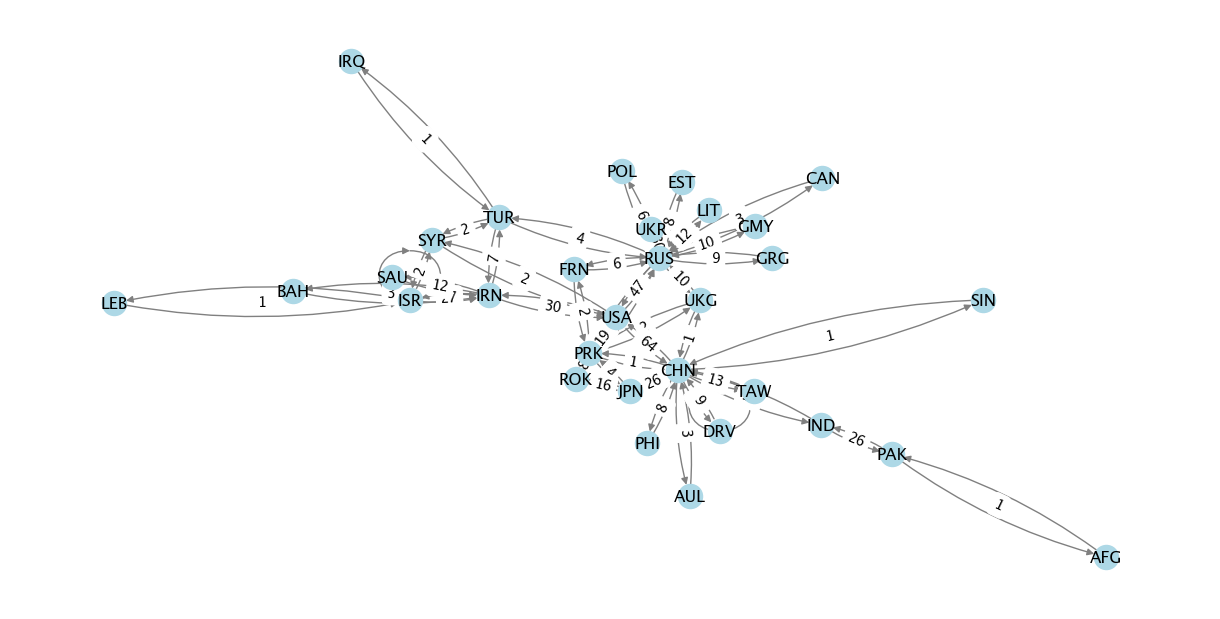

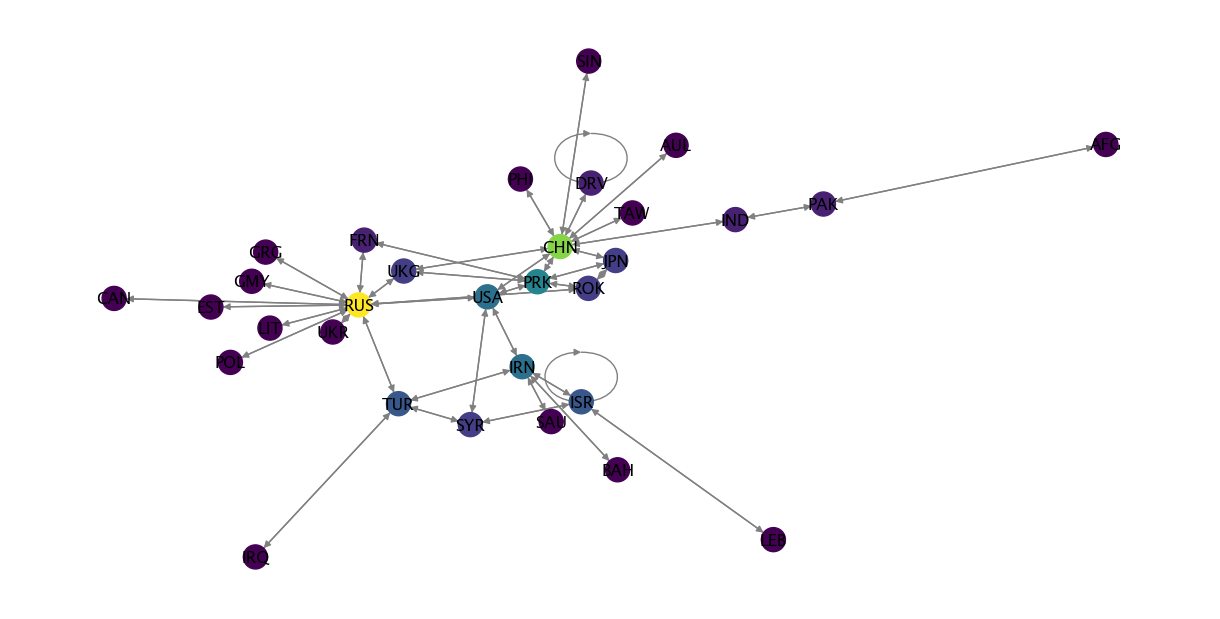

In [250]:
import networkx as nx
from matplotlib import pyplot as plt # type: ignore

G = nx.DiGraph(adjacency_matrix)
print(G.edges(data=True))

# FIXME: make the graph directed
# G.add_edges_from(adjacency_matrix.values)

plt.figure(figsize=(12, 6))

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_weight='bold', connectionstyle="arc3,rad=0.1")

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

# FIXME: choose a better layout: https://memgraph.github.io/networkx-guide/visualization/basics/#layouts
# pos = nx.spring_layout(G)
# pos = nx.shell_layout(G)

# color the nodes based on their degree
plt.figure(figsize=(12, 6))
nx.draw(G, with_labels=True, node_color=[G.degree(node) for node in G], edge_color='gray', font_weight='bold')

# show the datastructure of the graph
# print(G.nodes(data=True))



/var/folders/_n/cr6ptksj1dsbz9x2708vf12m0000gn/T/ipykernel_16015/2847697511.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


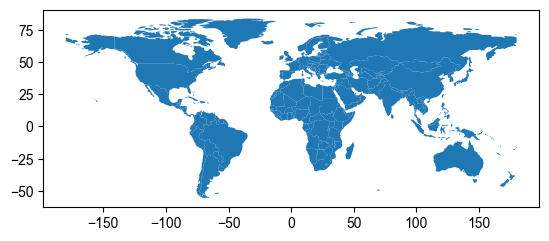

(39.7837304, -100.445882)


In [251]:
# Show the network on a map
# https://towardsdatascience.com/from-geojson-to-network-graph-analyzing-world-country-borders-in-python-ab81b5a8ce5a 

import geopandas as gpd
plt.rcParams['font.family'] = 'Arial'

world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_map = world_map[world_map['continent'] != 'Antarctica']
world_map.plot()
plt.show() 

world_map = world_map.set_index('iso_a3')

# 1. Geocode the countries
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="dcid-sna")

def geolocate(country):
    loc = geolocator.geocode(country)
    return (loc.latitude, loc.longitude)

print(geolocate('USA'))

# 2. Add the latitude and longitude to the graph

# for node in G.nodes:
#     country = labels[node]
#     lat, lon = geolocate(country)
#     G.nodes[node]['latitude'] = lat
#     G.nodes[node]['longitude'] = lon
# node_positions = {n: (d['longitude'], d['latitude']) for n, d in G.nodes(data=True)}

# 3. Plot the network on the map



In [252]:
centrality = nx.degree_centrality(G)
centrality = pd.DataFrame(centrality.items(), columns=['Country', 'Centrality'])
centrality = centrality.sort_values(by='Centrality', ascending=False)
print(centrality)


   Country  Centrality
22     RUS    0.800000
4      CHN    0.666667
20     PRK    0.400000
11     IRN    0.333333
30     USA    0.333333
27     TUR    0.266667
13     ISR    0.266667
14     JPN    0.200000
21     ROK    0.200000
25     SYR    0.200000
28     UKG    0.200000
17     PAK    0.133333
7      FRN    0.133333
5      DRV    0.133333
10     IND    0.133333
12     IRQ    0.066667
9      GRG    0.066667
8      GMY    0.066667
0      AFG    0.066667
2      BAH    0.066667
1      AUL    0.066667
3      CAN    0.066667
6      EST    0.066667
19     POL    0.066667
15     LEB    0.066667
16     LIT    0.066667
18     PHI    0.066667
26     TAW    0.066667
24     SIN    0.066667
23     SAU    0.066667
29     UKR    0.066667


In [253]:
# Todo: 
# - Out Degree: https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_degree.html
# - In Degree: https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html
# - Degree Centrality: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html
# - Transitivity: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.transitivity.html
# - Reciprocity: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.reciprocity.html
# - Cliques: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.clique.find_cliques.html